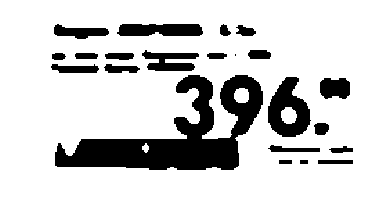

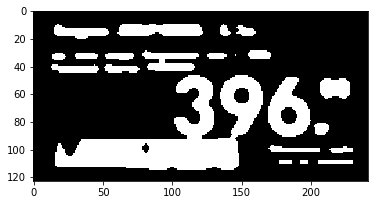

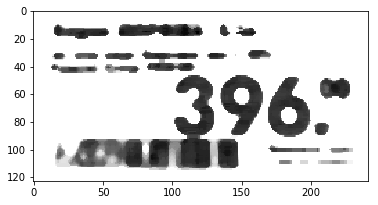

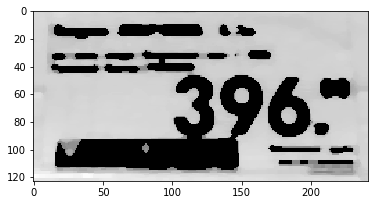

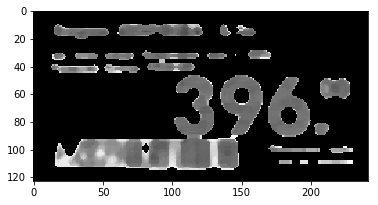

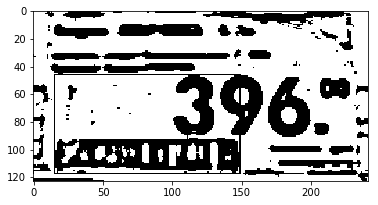

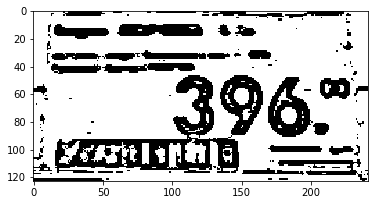

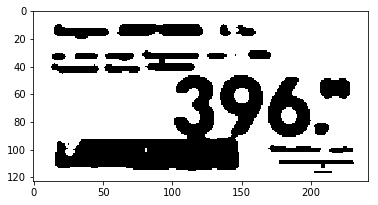

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [-1  2  4 -1]
  [ 5 -1 -1  3]
  [ 6  4 -1  3]
  [ 7  5 -1  3]
  [ 8  6 -1  3]
  [ 9  7 -1  3]
  [10  8 -1  3]
  [11  9 -1  3]
  [12 10 -1  3]
  [13 11 -1  3]
  [14 12 -1  3]
  [15 13 -1  3]
  [16 14 -1  3]
  [17 15 -1  3]
  [18 16 -1  3]
  [19 17 -1  3]
  [20 18 -1  3]
  [21 19 -1  3]
  [22 20 -1  3]
  [23 21 -1  3]
  [24 22 -1  3]
  [25 23 -1  3]
  [26 24 -1  3]
  [27 25 -1  3]
  [28 26 -1  3]
  [29 27 -1  3]
  [30 28 -1  3]
  [31 29 -1  3]
  [32 30 -1  3]
  [33 31 -1  3]
  [34 32 -1  3]
  [35 33 -1  3]
  [36 34 -1  3]
  [39 35 37  3]
  [38 -1 -1 36]
  [-1 37 -1 36]
  [42 36 40  3]
  [41 -1 -1 39]
  [-1 40 -1 39]
  [45 39 43  3]
  [44 -1 -1 42]
  [-1 43 -1 42]
  [62 42 46  3]
  [47 -1 -1 45]
  [48 46 -1 45]
  [49 47 -1 45]
  [50 48 -1 45]
  [51 49 -1 45]
  [52 50 -1 45]
  [53 51 -1 45]
  [54 52 -1 45]
  [55 53 -1 45]
  [56 54 -1 45]
  [57 55 -1 45]
  [58 56 -1 45]
  [59 57 -1 45]
  [60 58 -1 45]
  [61 59 -1 45]
  [-1 60 -1 45]
  [63 45

In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
img = cv2.imread('2.jpg', 1)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

kernel = np.ones((1,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

opening = cv2.cvtColor(opening, cv2.COLOR_BGRA2GRAY)
opening = cv2.medianBlur(opening, 5)

ret,thresh1 = cv2.threshold(opening,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(opening,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(opening,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(opening,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(opening,127,255,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(opening,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(opening,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  cv2.THRESH_BINARY,11,2)
ret,thresh8 = cv2.threshold(opening, 0,255,  cv2.THRESH_OTSU)


thresh6, contours1, hierarchy = cv2.findContours(thresh6, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#thresh1 = cv2.drawContours(opening, contours1, -1, (255,255,0), 1)
cnt = contours1[45]
for i in (4,cnt):
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
    box = np.int0(box)
    thresh6 = cv2.drawContours(thresh6,[box],0,(0,0,0),1)
#thresh1 = cv2.rectangle(opening,(x,y),(x+w,y+h),(0,255,0),1)

h,w = img.shape[:2]
#plt.imshow(img,cmap='gray')
#plt.show()
#plt.imshow(erosion,cmap='gray')
#plt.show()
#plt.imshow(dilation,cmap='gray')
#plt.show()
#plt.imshow(opening,cmap='gray')
#plt.show()
#plt.imshow(closing,cmap='gray')
#plt.show()
#plt.imshow(gradient,cmap='gray')
#plt.show()
#plt.imshow(tophat,cmap='gray')
#plt.show()
#plt.imshow(blackhat,cmap='gray')
#plt.show()

plt.imshow(thresh1,cmap='gray')
plt.show()
plt.imshow(thresh2,cmap='gray')
plt.show()
plt.imshow(thresh3,cmap='gray')
plt.show()
plt.imshow(thresh4,cmap='gray')
plt.show()
plt.imshow(thresh5,cmap='gray')
plt.show()
plt.imshow(thresh6,cmap='gray')
plt.show()
plt.imshow(thresh7,cmap='gray')
plt.show()
plt.imshow(thresh8,cmap='gray')
plt.show()


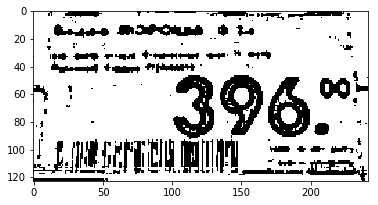

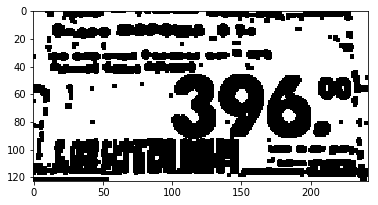

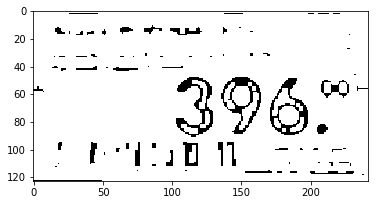

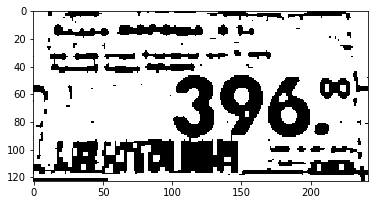

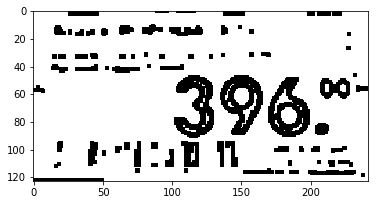

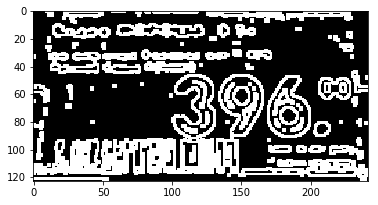

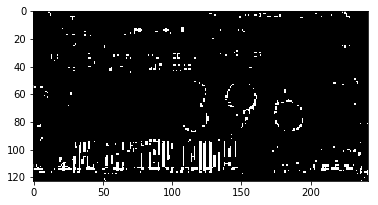

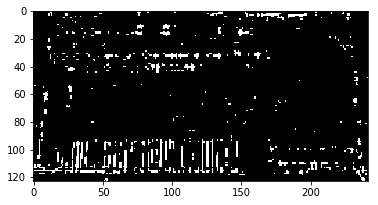

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_threshgauss.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

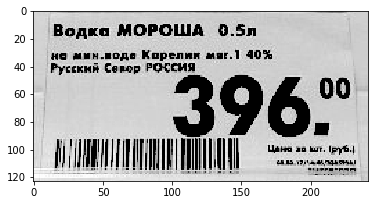

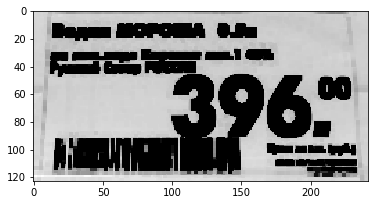

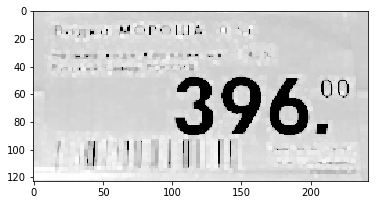

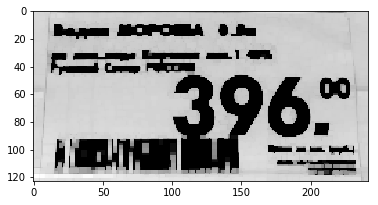

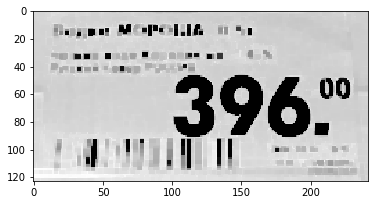

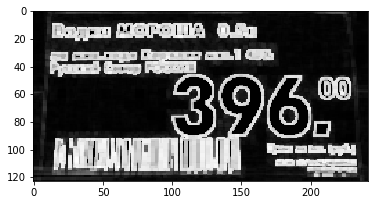

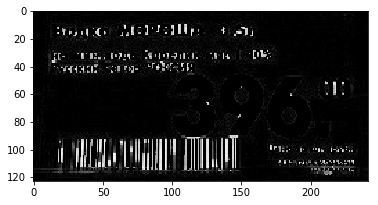

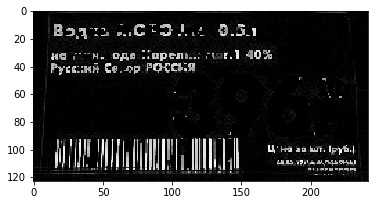

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_tozero.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

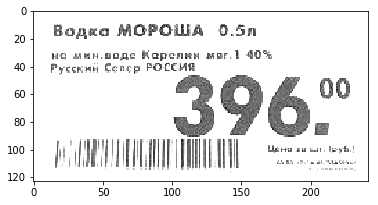

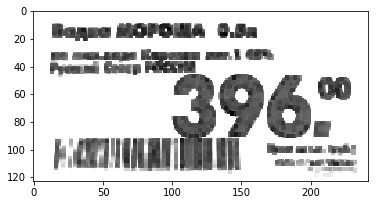

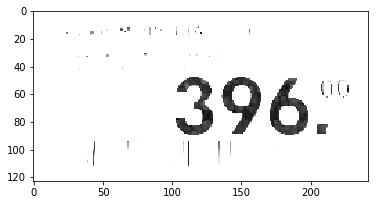

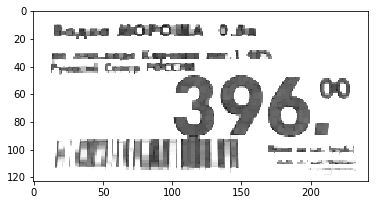

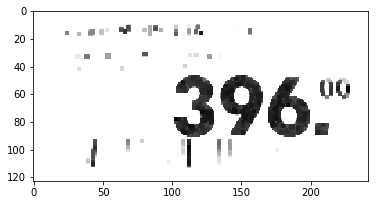

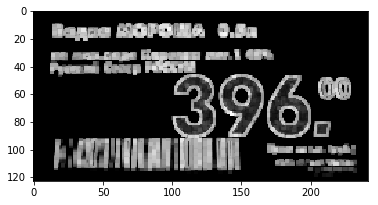

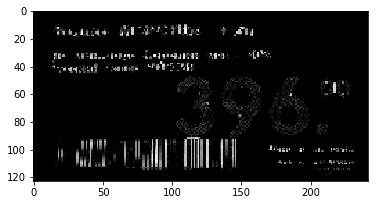

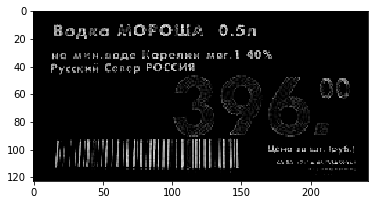

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_trunk.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

#рассмотреть разности в данных картинках

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_medianblur_c3.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
#plt.imshow(img,cmap='gray')
#plt.show()
#plt.imshow(erosion,cmap='gray')
#plt.show()
#plt.imshow(dilation,cmap='gray')
#plt.show()
#plt.imshow(opening,cmap='gray')
#plt.show()
#plt.imshow(closing,cmap='gray')
#plt.show()
#plt.imshow(gradient,cmap='gray')
#plt.show()
plt.imshow(tophat,cmap='gray')
plt.savefig('./1filters/2medianblur_k3_topthat.png')
#plt.imshow(blackhat,cmap='gray')
#plt.show()

error: /io/opencv/modules/core/src/matrix.cpp:949: error: (-215) dims <= 2 && step[0] > 0 in function locateROI


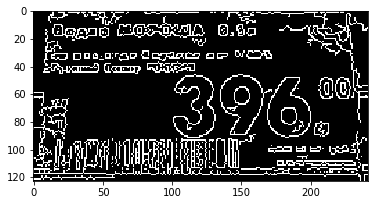

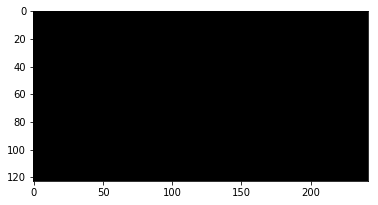

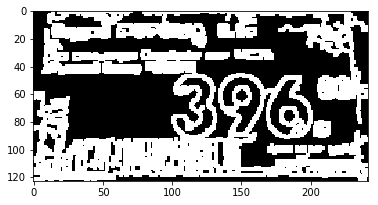

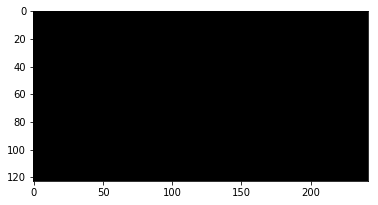

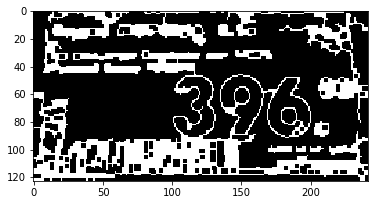

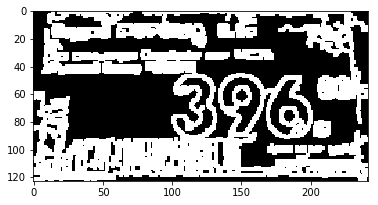

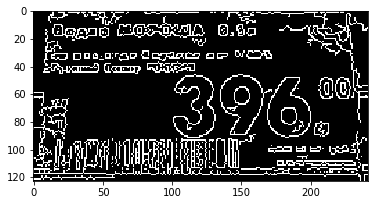

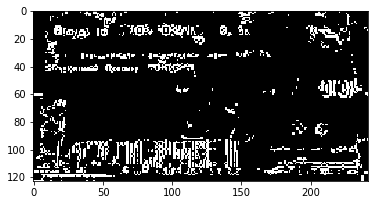

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_medianblur_с3.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

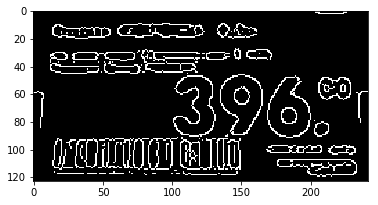

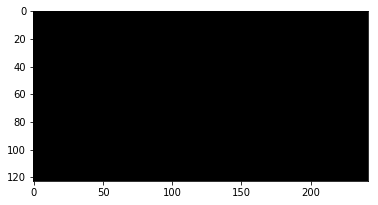

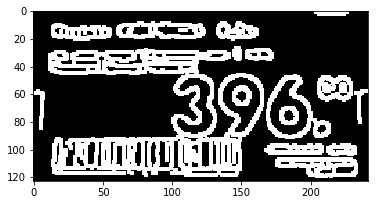

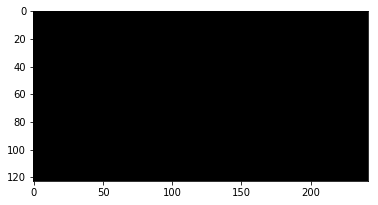

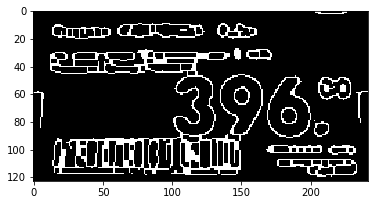

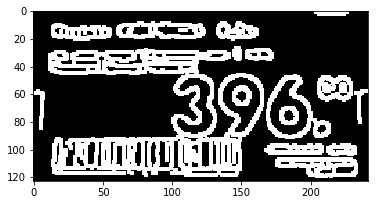

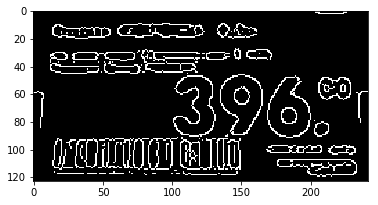

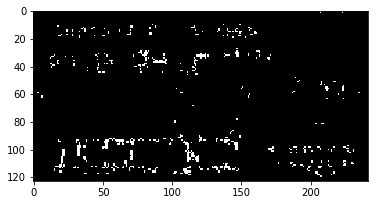

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_medianblur_с5.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

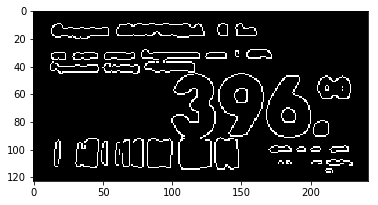

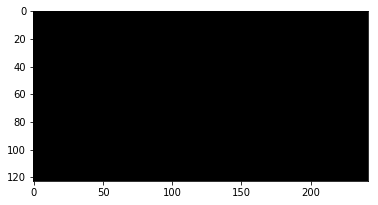

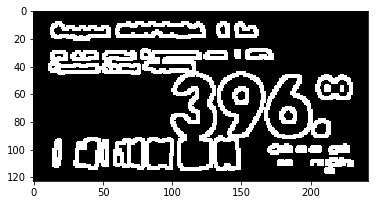

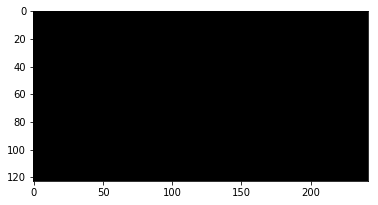

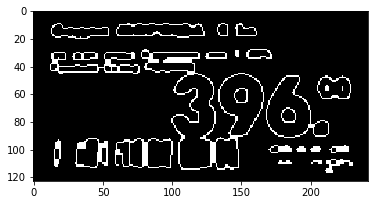

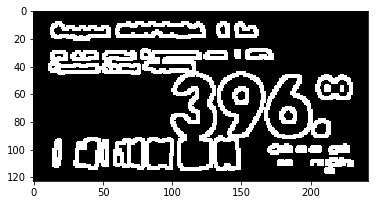

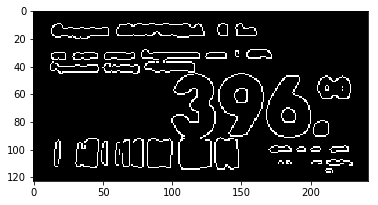

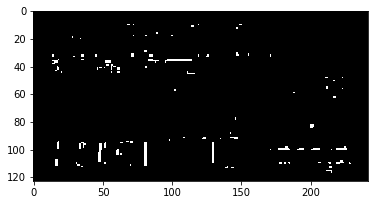

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_otsu.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

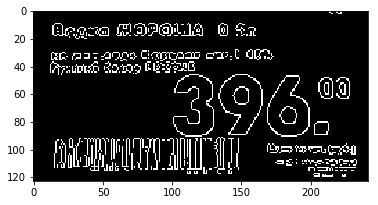

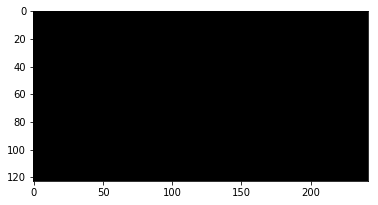

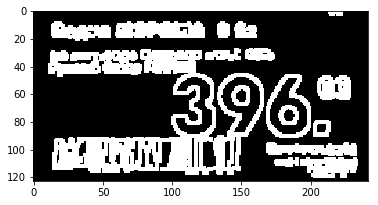

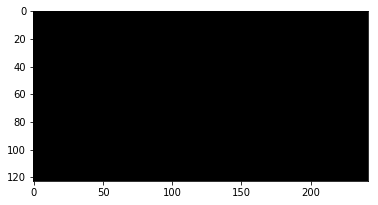

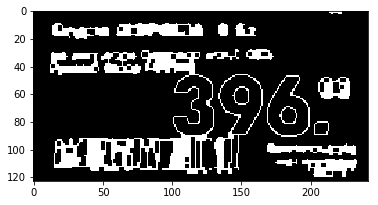

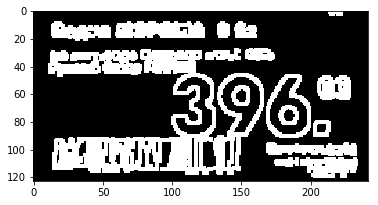

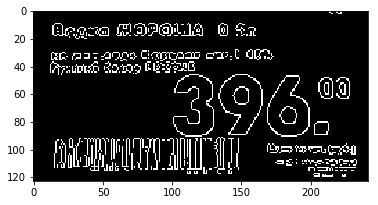

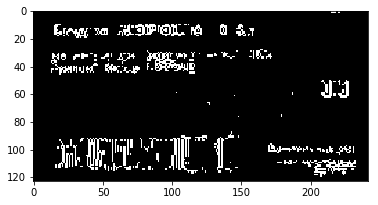

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_OpenCV_filters/2_otsu_notblur.png', 0)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
plt.imshow(img,cmap='gray')
plt.show()
plt.imshow(erosion,cmap='gray')
plt.show()
plt.imshow(dilation,cmap='gray')
plt.show()
plt.imshow(opening,cmap='gray')
plt.show()
plt.imshow(closing,cmap='gray')
plt.show()
plt.imshow(gradient,cmap='gray')
plt.show()
plt.imshow(tophat,cmap='gray')
plt.show()
plt.imshow(blackhat,cmap='gray')
plt.show()

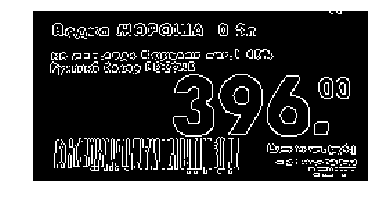

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

img = cv2.imread('KB_OpenCV_filters/2_otsu_notblur.png', 1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img = cv2.GaussianBlur(img, (1, 1), 1.5) 

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]
#plt.imshow(img,cmap='gray')
#plt.show()
#plt.imshow(erosion,cmap='gray')
#plt.show()
plt.imshow(dilation,cmap='gray')
plt.savefig('./1filters/2otsugaussblur_dilation.png', bbox_inches = extent)
#plt.imshow(opening,cmap='gray')
#plt.show()
plt.imshow(closing,cmap='gray')
plt.savefig('./1filters/2otsugaussblur_closing.png', bbox_inches = extent)
plt.imshow(gradient,cmap='gray')
plt.savefig('./1filters/2otsugaussblur_gradient.png', bbox_inches = extent)
plt.imshow(tophat,cmap='gray')
plt.savefig('./1filters/2otsugaussblur_tophat.png', bbox_inches = extent)
#plt.imshow(blackhat,cmap='gray')
#plt.show()

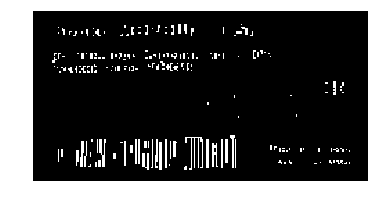

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline
img = cv2.imread('KB_my_pics/2.jpg', 1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img = cv2.bilateralFilter(img,9,75,75) 
t, img = cv2.threshold(img, 0,255,  cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

#plt.imshow(img,cmap='gray')
#plt.show()
#plt.imshow(erosion,cmap='gray')
#plt.show()
plt.imshow(dilation,cmap='gray')
plt.savefig('./1filters/2otsubilaterial_dilation.png', bbox_inches = extent)
#plt.imshow(opening,cmap='gray')
#plt.show()
plt.imshow(closing,cmap='gray')
plt.savefig('./1filters/2otsubilaterial_closing.png', bbox_inches = extent)
plt.imshow(gradient,cmap='gray')
plt.savefig('./1filters/2otsubilaterial_gradient.png', bbox_inches = extent)
plt.imshow(tophat,cmap='gray')
plt.savefig('./1filters/2otsubilaterial_tophat.png', bbox_inches = extent)
#plt.imshow(blackhat,cmap='gray')
#plt.show()

In [26]:
type(img)


NoneType

In [25]:
img = cv2.imread('KB_my_pics/3.jpg', 1)

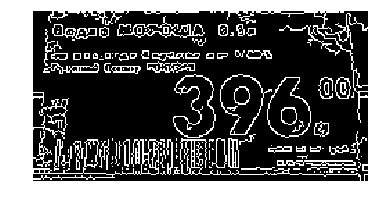

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

img = cv2.imread('KB_OpenCV_filters/2_medianblur_с3.png', 1)
kernel = np.ones((3,3), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

h,w = img.shape[:2]

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
                                            
#plt.imshow(img,cmap='gray')
#plt.savefig('./1filters/2.png', bbox_inches=extent)
#plt.imshow(erosion,cmap='gray')
#plt.savefig('./1filters/2trunk_erosion.png', bbox_inches=extent)
#plt.imshow(dilation,cmap='gray')
#plt.savefig('./1filters/2otsu+blur_dilation.png', bbox_inches=extent)
#plt.imshow(opening,cmap='gray')
#plt.savefig('./1filters/2tozero_opening.png', bbox_inches=extent)
#plt.imshow(closing,cmap='gray')
#plt.savefig('./1filters/2otsu+blur_closing.png', bbox_inches=extent)
#plt.imshow(gradient,cmap='gray')
#plt.savefig('./1filters/2otsu+blur_gradient.png', bbox_inches=extent)
plt.imshow(tophat,cmap='gray')
plt.savefig('./1filters/2medianblur_c3_tophat.png', bbox_inches=extent)
#plt.imshow(blackhat,cmap='gray')
#plt.savefig('./1filters/2tozero_blackhat.png', bbox_inches=extent)

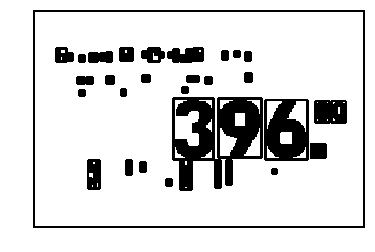

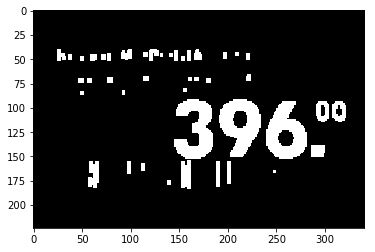

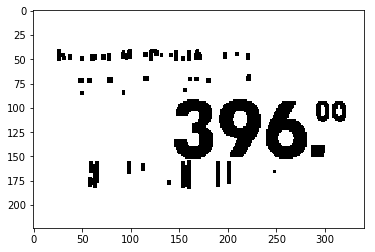

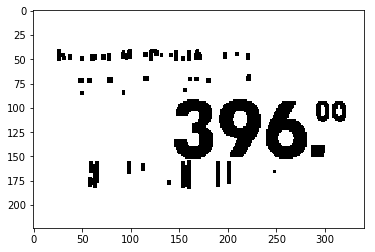

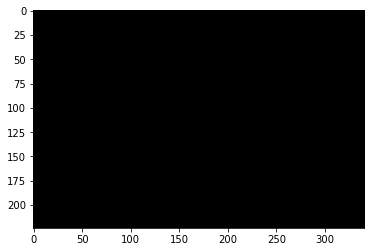

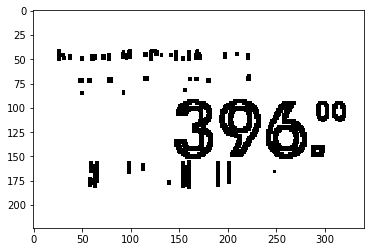

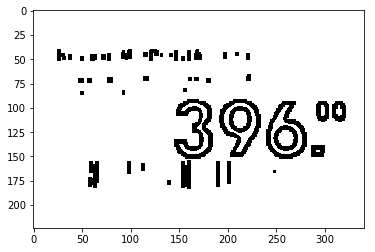

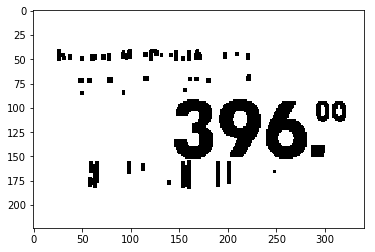

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 4  2 -1  0]
  [ 5  3 -1  0]
  [ 6  4 -1  0]
  [ 7  5 -1  0]
  [ 8  6 -1  0]
  [ 9  7 -1  0]
  [10  8 -1  0]
  [12  9 11  0]
  [-1 -1 -1 10]
  [14 10 13  0]
  [-1 -1 -1 12]
  [16 12 15  0]
  [-1 -1 -1 14]
  [18 14 17  0]
  [-1 -1 -1 16]
  [19 16 -1  0]
  [20 18 -1  0]
  [21 19 -1  0]
  [22 20 -1  0]
  [23 21 -1  0]
  [24 22 -1  0]
  [25 23 -1  0]
  [26 24 -1  0]
  [27 25 -1  0]
  [28 26 -1  0]
  [29 27 -1  0]
  [30 28 -1  0]
  [31 29 -1  0]
  [32 30 -1  0]
  [33 31 -1  0]
  [34 32 -1  0]
  [35 33 -1  0]
  [36 34 -1  0]
  [37 35 -1  0]
  [38 36 -1  0]
  [39 37 -1  0]
  [40 38 -1  0]
  [41 39 -1  0]
  [42 40 -1  0]
  [43 41 -1  0]
  [44 42 -1  0]
  [45 43 -1  0]
  [46 44 -1  0]
  [47 45 -1  0]
  [-1 46 -1  0]]]


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
img = cv2.imread('./1filters/2otsubilaterial_closing.png', 1)
#img = cv2.imread('./1filters/2_closing.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  cv2.THRESH_BINARY,11,2)
ret,thresh8 = cv2.threshold(img, 0,255,  cv2.THRESH_OTSU)

boxes = []
thresh1,contours1, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for cnt in contours1:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect) 
    box = np.int0(box)
    boxes.append(box)
    cv2.drawContours(thresh1, boxes,-1,(0,0,0),2)    

plt.imshow(thresh1,cmap='gray')
plt.show()
plt.imshow(thresh2,cmap='gray')
plt.show()
plt.imshow(thresh3,cmap='gray')
plt.show()
plt.imshow(thresh4,cmap='gray')
plt.show()
plt.imshow(thresh5,cmap='gray')
plt.show()
plt.imshow(thresh6,cmap='gray')
plt.show()
plt.imshow(thresh7,cmap='gray')
plt.show()
plt.imshow(thresh8,cmap='gray')
plt.show()
print(hierarchy)

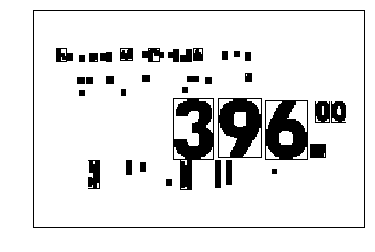

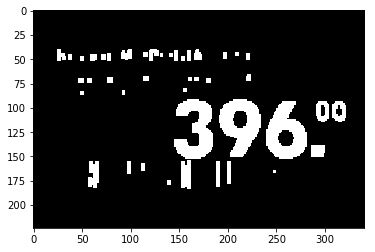

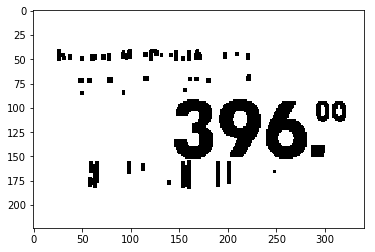

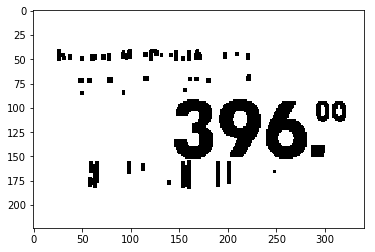

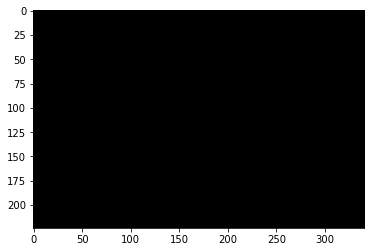

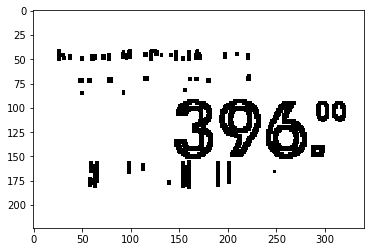

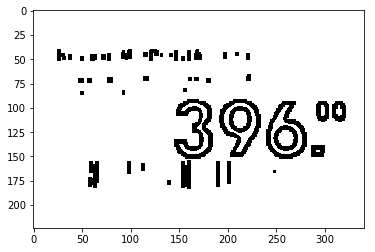

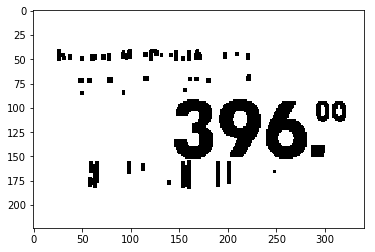

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
img = cv2.imread('./1filters/2otsubilaterial_closing.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig=plt.figure()
ax=fig.add_subplot(1,1,1)
plt.axis('off')
extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  cv2.THRESH_BINARY,11,2)
ret,thresh8 = cv2.threshold(img, 0,255,  cv2.THRESH_OTSU)

boxes = []
thresh1,contours1, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for cnt in contours1:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect) 
    box = np.int0(box)
    boxes.append(box)
    cv2.drawContours(thresh1, boxes,-1,(0,0,0),1)    

plt.imshow(thresh1,cmap='gray')
plt.show()
plt.imshow(thresh2,cmap='gray')
plt.show()
plt.imshow(thresh3,cmap='gray')
plt.show()
plt.imshow(thresh4,cmap='gray')
plt.show()
plt.imshow(thresh5,cmap='gray')
plt.show()
plt.imshow(thresh6,cmap='gray')
plt.show()
plt.imshow(thresh7,cmap='gray')
plt.show()
plt.imshow(thresh8,cmap='gray')
plt.show()
